In [2]:
"""
conda install -c plotly plotly chart-studio
pip install cufflinks


package                    |            build
    ---------------------------|-----------------
    chart-studio-1.1.0         |             py_0          50 KB  plotly
    plotly-4.6.0               |             py_0         4.0 MB  plotly
    ------------------------------------------------------------
                                           Total:         4.0 MB
"""

import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series,DataFrame



In [3]:
from plotly import __version__
print(__version__)

4.6.0


In [6]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [7]:
init_notebook_mode(connected=True)
cf.go_offline()

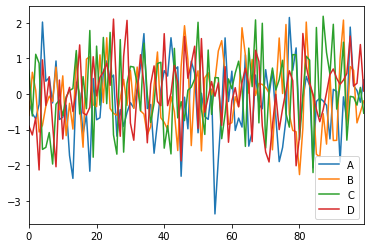

In [8]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32, 43, 50]})

# regular matplotlib plot
df.plot()

In [9]:
df.iplot()

In [10]:
df.iplot(kind='scatter',x='A',y='B', mode='markers',size=11)

In [11]:
# use iplot on aggregation functions to be more useful
df.sum().iplot(kind='bar')

In [12]:
df2

,Category,Values
0,A,32
1,B,43
2,C,50


In [13]:
df2.iplot(kind='bar',x='Category',y='Values')

In [14]:
df.iplot(kind='box')

In [16]:
# create three columnsabs
df3 = pd.DataFrame({'x':[1,2,3,4,5], 'y':[10,20,30,20,10], 'z':[500,400,300,200,100]})

df3.iplot(kind='surface',colorscale='rdylbu')

In [17]:
df.iplot(kind='hist')

In [18]:
df[['A','B']].iplot(kind='spread')

In [19]:
# choropleth maps
# conda install -c plotly plotly chart-studio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [20]:
# USA State Map
data = dict(type = 'choropleth', locations = ['AZ','CA','NY'], locationmode = 'USA-states',
           colorscale = 'Portland', # Jet Greens
           text = ['test 1', 'test 2', 'test 3'],
            z = [1.0,2.0,3.0],
           colorbar={'title':'Colorbar Title'})

layout = dict(geo={'scope':'usa'})

choromap = go.Figure(data = [data], layout=layout)

iplot(choromap)

In [24]:
import pandas
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [28]:
df[['code','state']]

,code,state
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California
5,CO,Colorado
6,CT,Connecticut
7,DE,Delaware
8,FL,Florida
9,GA,Georgia


In [22]:
# a more intense USA map plot

data = dict(type='choropleth',
           colorscale = 'YlOrRd',
           locations=df['code'],
           locationmode='USA-states',
           z = df['total exports'],
           text = df['text'],
           marker = dict(line=dict(color = 'rgb(255,255,255)',width=2)), # line border between states
           colorbar = {'title':'Millions USD'})

# nice lake color = blue
layout = dict(title = '2011 Agriculture', 
             geo = dict(scope='usa',showlakes = True, lakecolor='rgb(85,173,240)'))

choromap2 = go.Figure(data = [data], layout=layout)

choromap2.iplot()

In [29]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [30]:
data = dict(type = 'choropleth',
           locations = df['CODE'],
           z = df['GDP (BILLIONS)'],
           text = df['COUNTRY'],
            colorscale = 'Viridis',
            reversescale = True, # This makes the color scale look better
           colorbar = {'title':'GDP in Billions USD'})

"""
The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['equirectangular', 'mercator', 'orthographic', 'natural
            earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4',
            'azimuthal equal area', 'azimuthal equidistant', 'conic
            equal area', 'conic conformal', 'conic equidistant',
            'gnomonic', 'stereographic', 'mollweide', 'hammer',
            'transverse mercator', 'albers usa', 'winkel tripel',
            'aitoff', 'sinusoidal']
"""

layout = dict(title = '2014 Global GDP',
             geo = dict(showframe = False,
                       projection = {'type':'natural earth'}))

choromap3 = go.Figure(data=[data], layout=layout)

choromap3.iplot()

In [31]:
df = pd.read_csv('2014_World_Power_Consumption')
df.head()

,Country,Power Consumption KWH,Text
0,China,5.523000e+12,"China 5,523,000,000,000"
1,United States,3.832000e+12,"United 3,832,000,000,000"
2,European,2.771000e+12,"European 2,771,000,000,000"
3,Russia,1.065000e+12,"Russia 1,065,000,000,000"
4,Japan,9.210000e+11,"Japan 921,000,000,000"


In [33]:
data = dict(type = 'choropleth',
           locations = df['Country'],
           locationmode='country names',
           z = df['Power Consumption KWH'],
           text = df['Country'],
            colorscale = 'Reds',
           colorbar = {'title':'Power Consumption kWH'})

layout = dict(title = '2014 Power Consumption',
             geo = dict(showframe = False,
                       projection = {'type':'mercator'}))

choromap = go.Figure(data=[data],layout=layout)
iplot(choromap,validate=False)